data shape is: (506, 13)
data range is: 0.0 0.9933950082591989
input data shape is: (506, 13)
Output data shape is: (506,)
input data shape after adding bias is: (506, 14)
(506, 1)
training data shape (450, 14) (450, 1)
testing data shape (56, 14) (56, 1)
[[0.00000000e+00 1.26388341e-05 3.59966795e-02 4.61957387e-03
  0.00000000e+00 1.07590075e-03 1.31487871e-02 1.30387972e-01
  8.17924550e-03 1.99981553e-03 5.91945396e-01 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [0.00000000e+00 5.78529889e-05 0.00000000e+00 1.49769546e-02
  0.00000000e+00 9.93520754e-04 1.36021253e-02 1.67140272e-01
  1.05222110e-02 4.23676228e-03 5.12648235e-01 3.77071843e-02
  8.40785474e-01 1.93620036e-02]]
MSE after: 100 iterations :  66.32751758929815


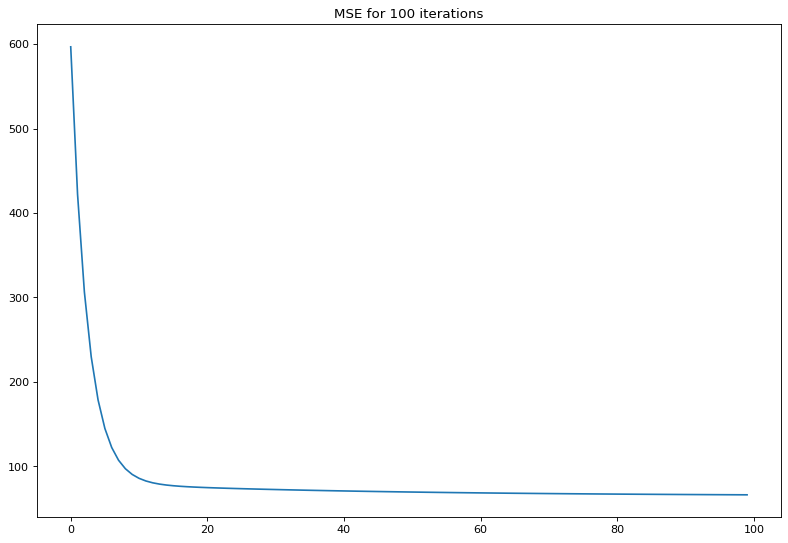

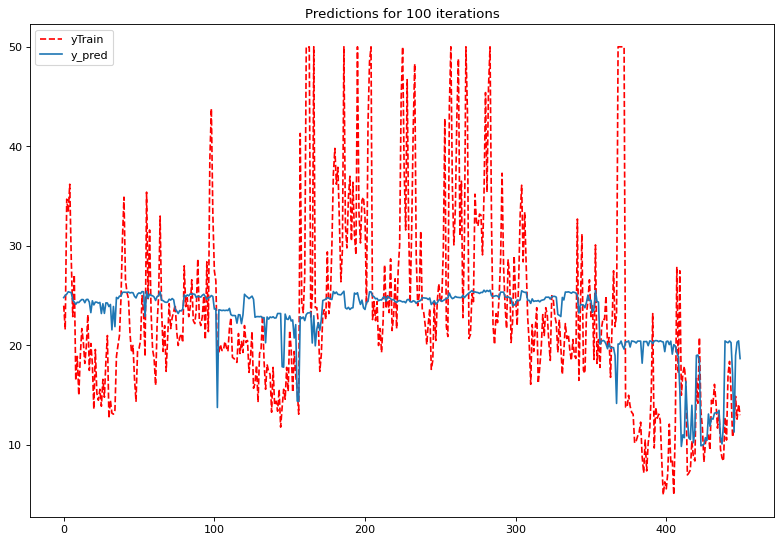

MSE after: 1000 iterations :  62.11918200467929


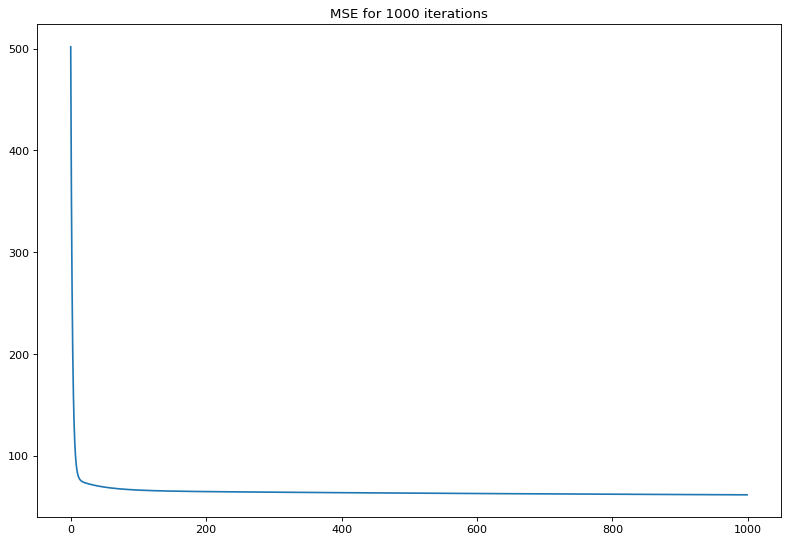

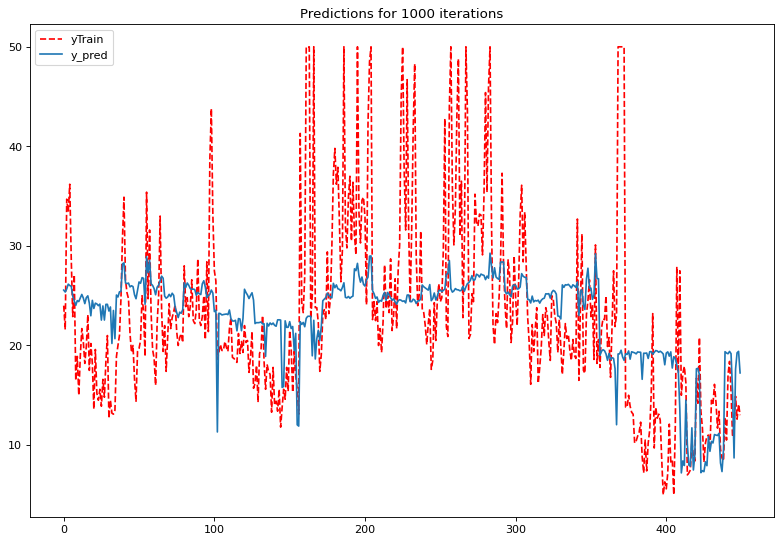

MSE after: 10000 iterations :  53.78098640441424


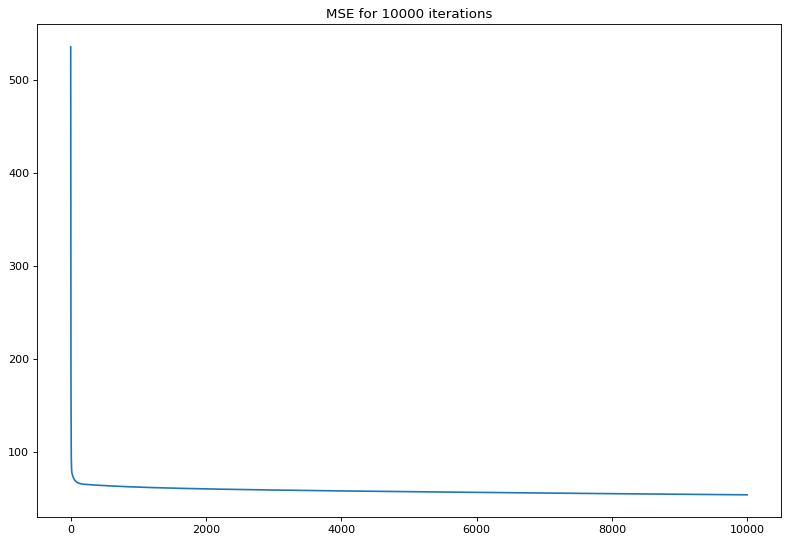

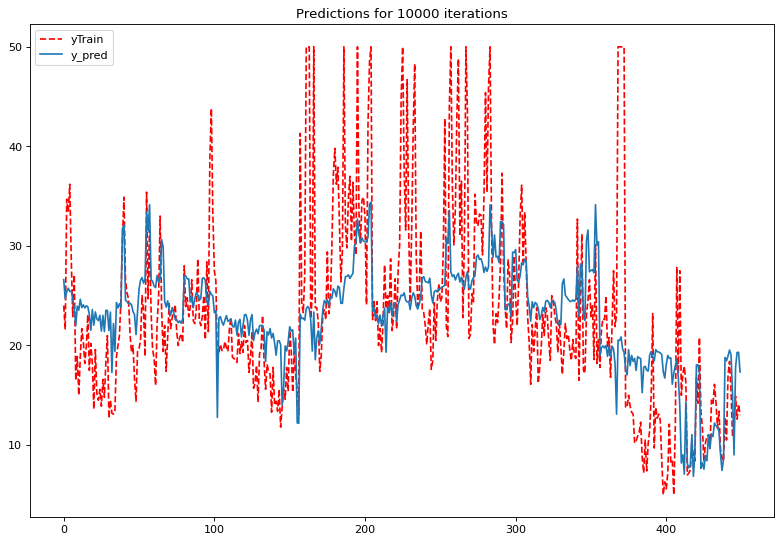

MSE after: 40000 iterations :  43.160115965020374


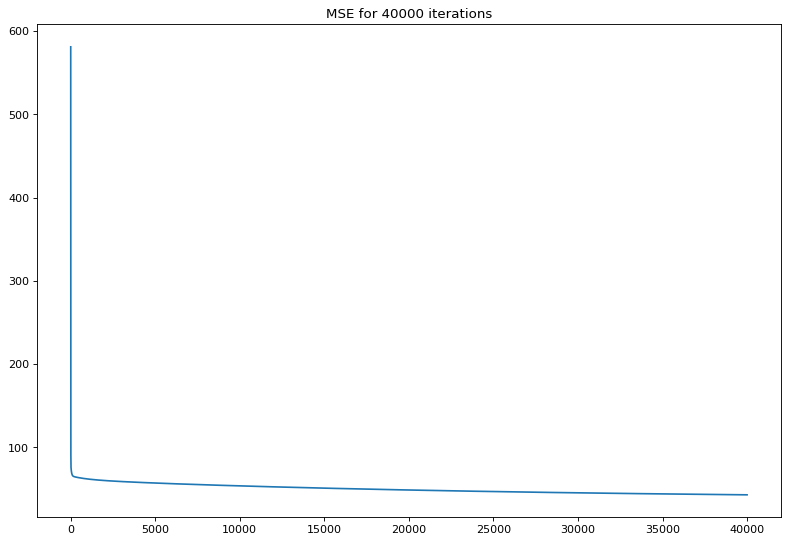

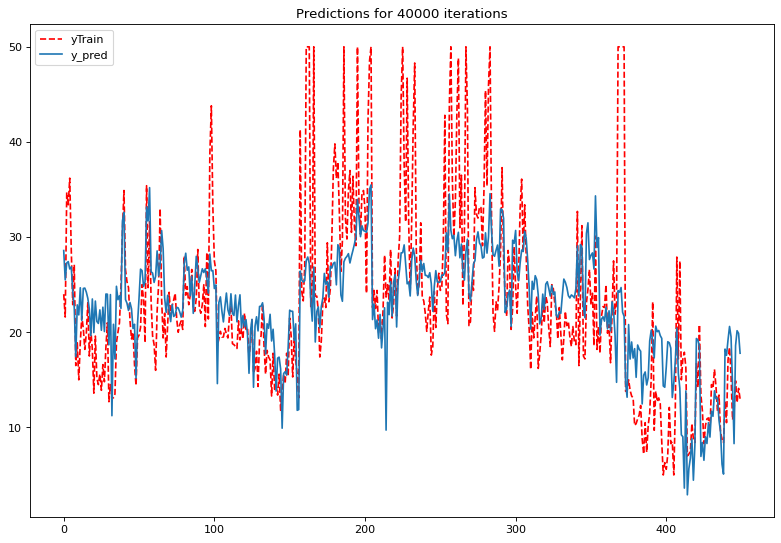

In [33]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import warnings

# Step 2: Read data as array
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Step 3: Normalize Data
data = normalize(data, norm='l2')
print("data shape is:", data.shape) # data shape
print("data range is:",np.min(data), np.max(data))

# Step 4: Split data into target and input
X_b = data[:,:13]  #input
y = target  #target
print("input data shape is:", X_b.shape) # input data shape
print("Output data shape is:", y.shape) # input data shape

# Step 5: Add bias
X_b = np.column_stack((np.zeros((506, 1)), X_b))
print("input data shape after adding bias is:", X_b.shape) # input data shape

# rearrange data
y = np.reshape(y,(506,1))
print(y.shape)

# Step 6: Split data into train and test data
xTrain = X_b[:450,:]
yTrain = y[:450]
xTest = X_b[-56:,:]
yTest = y[-56:]
print("training data shape", xTrain.shape, yTrain.shape)
print("testing data shape", xTest.shape, yTest.shape)
print(xTrain[:2,:])

# Define number of iterations, learning rate, initial theta, and number of examples.
iterations = [100, 1000, 10000, 40000] # iterations
eta = 0.1 # learning rate
m = 506 # examples

# Run Gradient Descent (GD)
for n_iterations in iterations:
    theta = np.random.randn(14,1) # reset theta for each iteration
    mse = []
    for iteration in range(n_iterations):
        err = X_b.dot(theta) - y         # Step 1: find error
        gradients = 2*X_b.T.dot(err)/m   # Step 2: Find the gradient
        theta = theta - eta * gradients  # Step 3: Update the next step (new step or theta value)
        errm = err * err                 # Step 4: Calculate squared error (SE)
        mean_err = np.mean(errm)         # Step 5: Calculate mean squared error (MSE)
        mse.append(mean_err)
    print("MSE after:", n_iterations, "iterations : ", mse[-1])
    # Plot MSE
    plt.figure(figsize=(12, 8), dpi=80)
    plt.plot(np.array(mse))
    plt.title(f"MSE for {n_iterations} iterations")
    plt.show()
    # Plot predictions
    theta_best = theta
    y_predict = xTrain.dot(theta_best)
    error = yTrain-y_predict
    mean_err = sum(error)
    MSE= mean_err*mean_err
    # plot training results
    plt.figure(figsize=(12, 8), dpi=80)
    plt.plot(yTrain, 'r--', y_predict)
    plt.legend(['yTrain', 'y_pred'], loc='upper left')
    plt.title(f"Predictions for {n_iterations} iterations")
    plt.show()


In [38]:
# After 40000 iterations, print network weights and identify the inputs with the highest weight
if n_iterations == 40000:
        print("Network weights after 40000 iterations: ", theta_best.flatten())
        max_weight_index = np.argmax(theta_best)
        print("The input with the highest weight is at index: ", max_weight_index)


Network weights after 40000 iterations:  [   0.56778317  -45.68282735   43.61500384  -34.78952873    5.19881655
    0.54147866   61.25231505   28.50284207  -25.00921822   40.56074979
   11.90884301  -24.87525698   23.79306243 -240.20901897]
The input with the highest weight is at index:  6
